# CNN (Convolutional Neural Network) with *tf.keras*

In this notebook, we are going to create neural networks to classify images from the dataset [CIFAR10 small image classification](https://keras.io/datasets/)

**Objective : classify CIFAR10 images**
- Import and Verification of library versions
- Loading the CIFAR10 dataset
- Pre-processing
- Building a Fully Connected model
- Building a CNN model
- Prediction
- Visualization of predictions 

## ◢ 1 Import and Verification of library versions

In [ ]:
import tensorflow as tf
from tensorflow import keras  # tf.keras
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## ◢ 2 Loading the CIFAR10 dataset - small image classification

Keras allows to load many datasets with `keras.datasets`.
We will use the CIFAR10 small image classification dataset, which is a database of 60000 images gathering 10 image categories ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck").

It gathers 50000 learning images and 10000 test images
These images are in color and of 32 pixels of side.

In [ ]:
classes = [
    "avion",
    "voiture", 
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion"
]

Load the dataset using `keras.datasets.cifar10.load_data()`
Separate it into :
- a training set of 45000 images
- a validation set of 5000 images
- a test set of 10000 images

In [ ]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# TODO : To complete
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
X_valid.shape

(5000, 32, 32, 3)

## ◢ 3 Preprocessing
Reduce the pixel values between 0 and 1.

In [ ]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255


Display some images using the matplot library function `plt.imshow()` and display the class.

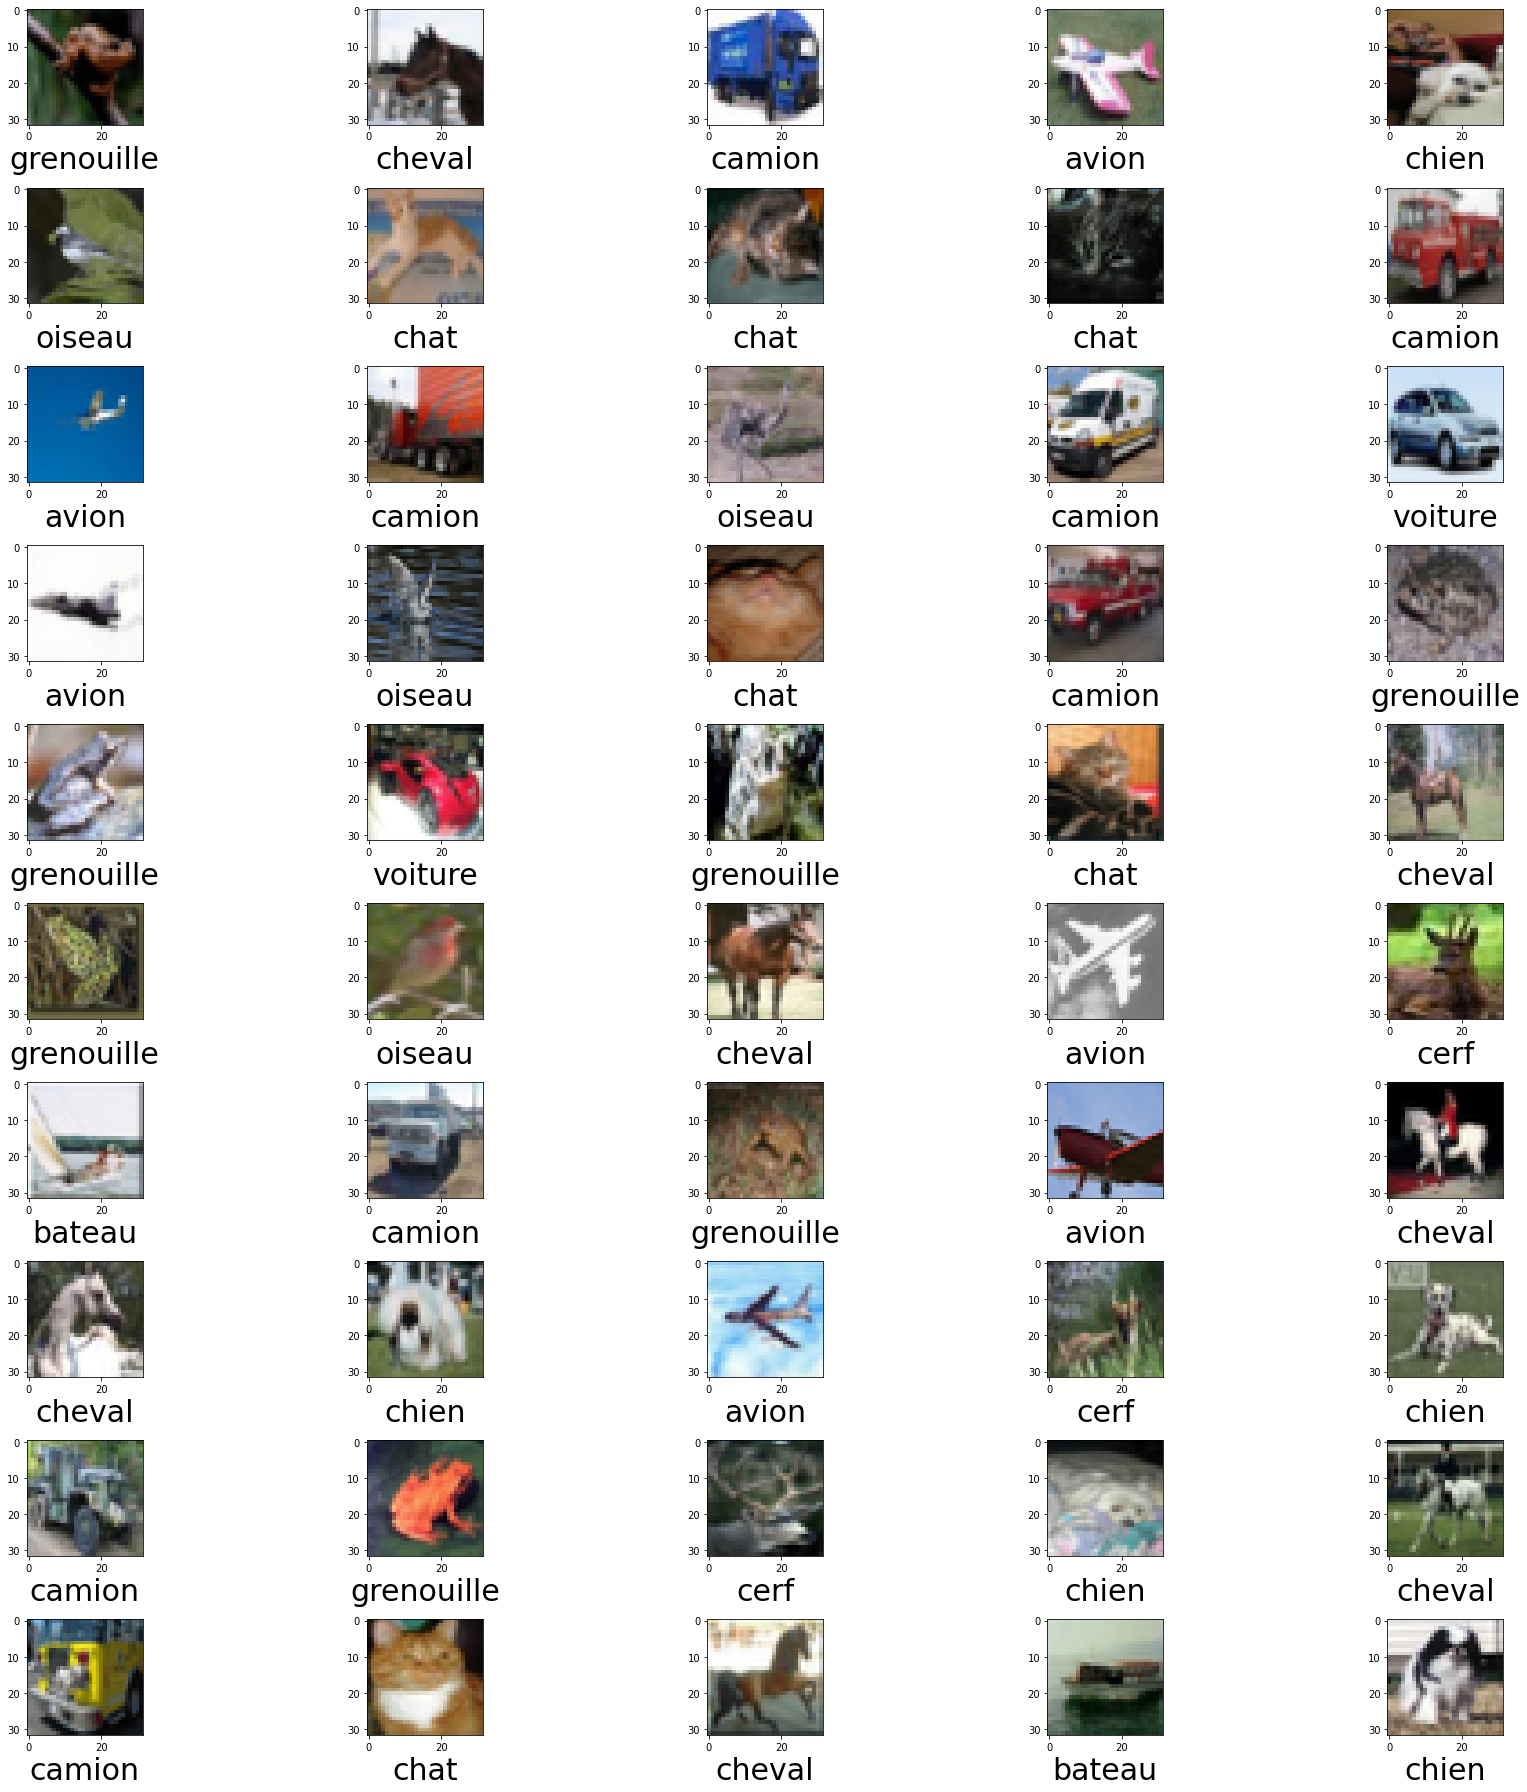

In [ ]:
plt.figure(figsize=(25, 25))
n_rows, n_cols = 10, 5
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(X_train[i])
        plt.xlabel(classes[y_train[i][0]], fontsize=30)
plt.tight_layout()
plt.show()

## ◢ 4 Building a Fully Connected model

Building a model with the `keras.models.Sequential` API, with no arguments, and with 4 layers:
  * A `Flatten` layer (`keras.layers.Flatten`) to convert each 32x32x3 image size into a simple 3072 pixel array. Since this layer is the first in your model, you must specify the `input_shape` argument.
  * A hidden layer `Dense` (`keras.layers.Dense`) with 128 neurons (also called units), and the activation function `"relu"`.
  * A hidden `Dense` layer (`keras.layers.Dense`) with 64 neurons (also called units), and the activation function ``replay``. 
  * Finally a `Dense` layer with 10 neurons (1 per class), and with the `"softmax"` activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.

In [ ]:
# TODO : To complete
model = keras.models.Sequential([
                 keras.layers.Flatten(input_shape=(32,32,3)),
                 keras.layers.Dense (128, activation='relu'),
                 keras.layers.Dense (64, activation='relu'),
                 keras.layers.Dense (10, activation='softmax')
])

Compile the model using :
- the loss function `sparse_categorical_crossentropy`
- the optimizer `keras.optimizers.SGD` with a `learning rate` of 0.1
- the `accuracy` metric

In [ ]:
# TODO : To complete
model.compile(optimizer =  keras.optimizers.SGD(learning_rate= 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Train the model with 20 epochs.
Use the validation data

In [ ]:
# TODO : To complete
history = model.fit(X_train,y_train,epochs=20, validation_data = (X_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7803 - accuracy: 0.3568 - val_loss: 1.8363 - val_accuracy: 0.3378
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7230 - accuracy: 0.3790 - val_loss: 1.8571 - val_accuracy: 0.3216
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6884 - accuracy: 0.3928 - val_loss: 1.7507 - val_accuracy: 0.3716
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6575 - accuracy: 0.4049 - val_loss: 1.6371 - val_accuracy: 0.4080
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6298 - accuracy: 0.4151 - val_loss: 1.8007 - val_accuracy: 0.3838
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6053 - accuracy: 0.4247 - val_loss: 1.6398 - val_accuracy: 0.4028
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5817 - accuracy: 0.4286 - val_loss: 1.6836 - val_accuracy:

Display the learning graph of the model

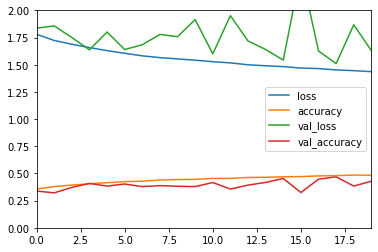

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 2])
plt.show()

We see on this curve that the model reaches an accuracy of about 40% and that the accuracy on the validation set tends to oscillate (lack of generalization of the model).

Before trying to build a model with a CNN architecture, let's call the summary() method on the model to note the number of trainable parameters.

In [ ]:
# TODO : To complete
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


## ◢ 5 Building a CNN model

Building a CNN model with the `keras.models.Sequential` API:
- **feature learning step** : Let's build 2 VGG blocks (a VGG block being conv2D >> conv2D >> MaxPool2D) : 
    - 1er bloc VGG : `Conv2D(filters=64) >> Conv2D(filters=64) >> MaxPool2D (pool_size=2)`
    - 2ème bloc VGG : `Conv2D(filters=128) >> Conv2D(filters=128) >> MaxPool2D (pool_size=2)` <br>
For each `Conv2D` layer, the `kernel size` must be `4`, the `padding` must be set to `valid` and the `activation function` must be `relu`
- **classification step**  : `Flatten >> Dense (1024 units + relu) >> Dense (10 units + softmax)`

Compile the model using :
- loss function `sparse_categorical_crossentropy`
- optimizer `adam`
- metric `accuracy`

Train the model with 30 epochs. Use the validation data

In [ ]:
# TODO : To complete
model = keras.models.Sequential([
     keras.layers.Conv2D(filters=64,kernel_size=4,padding='valid',activation='relu'),
     keras.layers.Conv2D(filters=64,kernel_size=4,padding='valid',activation='relu'),
     keras.layers.MaxPool2D (pool_size=2),
     keras.layers.Conv2D(filters=128,kernel_size=4,padding='valid',activation='relu'),
     keras.layers.Conv2D(filters=128,kernel_size=4,padding='valid',activation='relu'),
     keras.layers.MaxPool2D (pool_size=2),
     keras.layers.Flatten(),
     keras.layers.Dense (1024, activation='relu'),
     keras.layers.Dense (10, activation='softmax')
])


model.compile(optimizer =  keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # learning_rate=0.005 trop petit donc ne convrerge pas


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))

x = keras.layers.Conv2D(filters=64,kernel_size=4,padding='valid',activation='relu')(inputs)
x = keras.layers.Conv2D(filters=64,kernel_size=4,padding='valid',activation='relu')(x)
x = keras.layers.MaxPool2D (pool_size=2)(x)

x = keras.layers.Conv2D(filters=64,kernel_size=4,padding='valid',activation='relu')(x)
x = keras.layers.Conv2D(filters=64,kernel_size=4,padding='valid',activation='relu')(x)
x = keras.layers.MaxPool2D (pool_size=2)(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense (1024, activation='relu')(x)

outputs = keras.layers.Dense (10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model.compile(optimizer =  keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])




In [ ]:
history = model.fit(X_train,y_train,epochs=20, validation_data = (X_valid,y_valid))

AttributeError: ignored

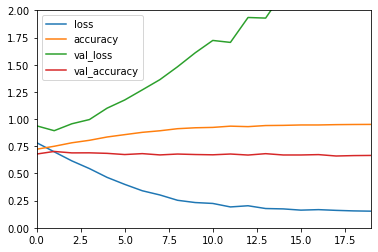

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 2])
plt.show()

We note that the model is unstable and tends to overfit. For this, how about changing the learning rate (try 0.005 and 0.0005). 

If this is not enough, add a dropout layer of 0.4 just after each VGG block.

## What do you notice when training the model?

Call the `summary()` method on the model

In [ ]:
# TODO : To complete
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 29, 29, 64)        3136      
                                                                 
 conv2d_38 (Conv2D)          (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 10, 10, 64)        65600     
                                                                 
 conv2d_40 (Conv2D)          (None, 7, 7, 64)          65600     
                                                       

Compare the number of parameters between the fully connected network and the CNN

## ◢  6 Prediction
Call the `predict()` method on the model to estimate the probability of each class for each instance (for better readability, use the `round()` method on the generated probabilities):

In [ ]:
y_proba = model.predict(X_test)
y_proba[:10].round(3)

313/313 [==============================] - 1s 3ms/step


array([[0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.999,
        0.   ],
       [0.167, 0.384, 0.011, 0.   , 0.003, 0.004, 0.   , 0.001, 0.06 ,
        0.37 ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.317, 0.683, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.997, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.001, 0.997, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

From the probabilities of the different values, let's deduce the predicted value (the one with the maximum % => use the `argmax` function)

In [ ]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([3, 8, 1, ..., 5, 4, 7])

## ◢ 7 Visualization of predictions 

Utility methods to display an image and a bar chart representing the probability of predictions for each number from 0 to 9 (predictions in blue are the correct predictions and in red the incorrect ones)

In [ ]:
def plot_prediction_image(predictions_array, true_label, img):

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Objet prédit {} {:2.0f}% ({})".format(classes[predicted_label],
                                                        np.max(predictions_array) *100,
                                                        classes[true_label[0]]),
                                                        color=color)
    
def plot_prediction_bar_chart(predictions_array, true_label, img):
    thisplot = plt.bar(classes, predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')
    plt.xticks(classes, rotation=90)

Display of the image to be predicted and the probability of predictions for each digit from 0 to 9 for the first image

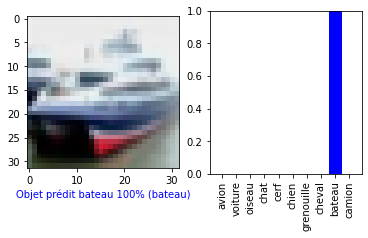

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_prediction_image(y_proba[i], y_test[i], X_test[i])
plt.subplot(1,2,2)
plot_prediction_bar_chart(y_proba[i], y_test[i], X_test[i])
plt.show()

### 7-1 Let's display the first 15 images and see the predictions 

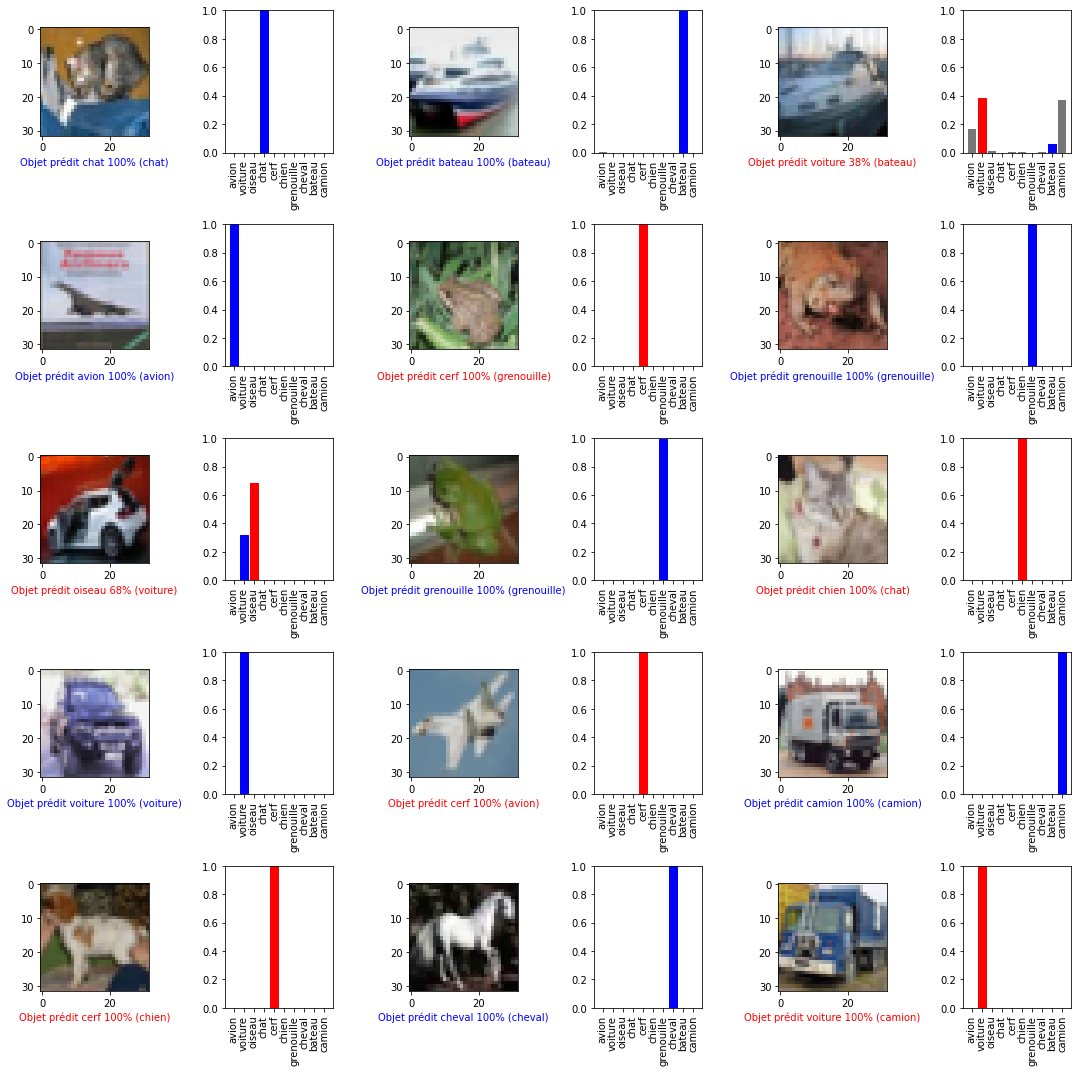

In [ ]:
num_rows = 5
num_cols = 3
plt.figure(figsize=(5*num_cols, 3*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba[index], y_test[index], X_test[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba[index], y_test[index], X_test[index])
plt.tight_layout()
plt.show()



### 7-2 Focus on mispredicted images

In [ ]:
y_test2 = y_test.reshape((1,-1))[0]

In [ ]:
y_proba_false = y_proba[y_pred != y_test2]
y_test_false = y_test[y_pred != y_test2]
X_test_false = X_test[y_pred != y_test2]

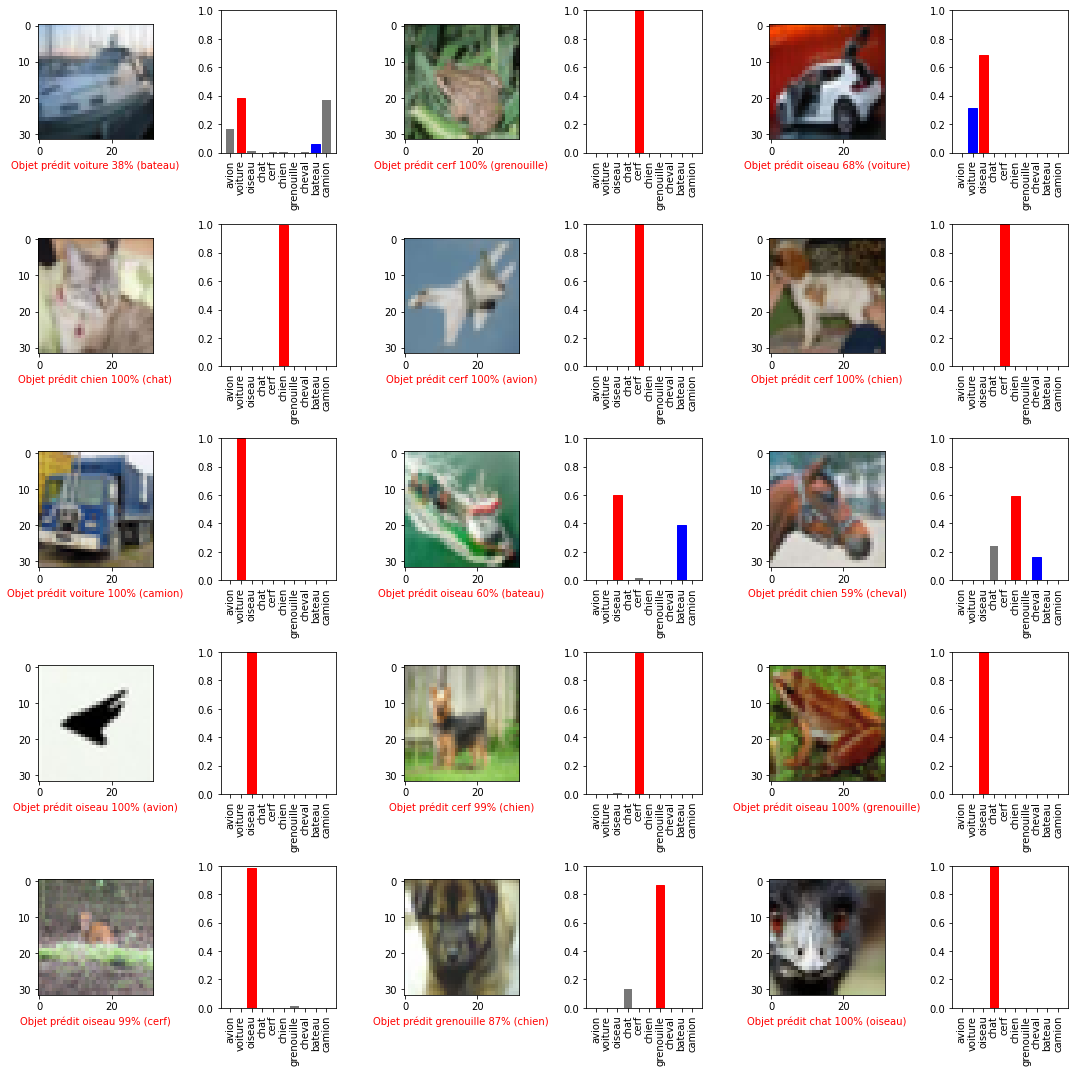

In [ ]:
num_rows = 5
num_cols = 3
plt.figure(figsize=(5*num_cols, 3*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba_false[index], y_test_false[index], X_test_false[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba_false[index], y_test_false[index], X_test_false[index])
plt.tight_layout()
plt.show()